In [94]:
# chargement des libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.graph_objects as go
from sklearn.preprocessing import RobustScaler

In [95]:
# chargement du dataset en affichant toutes les colonnes
data = pd.read_csv('FINAL_USO.csv', index_col='Date', parse_dates=True) # data = pd.read_csv('FINAL_USO.csv')
df = data.copy()

In [96]:
# afficher toutes les lignes et toutes les colonnes
pd.set_option('display.max_columns', df.shape[0]+1) # pd.to_datetime('2019/03/20')
pd.set_option("max_rows", None)
df.head()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,74.550003,76.150002,72.150002,72.900002,70.431755,787900,1.3018,1.2982,1.3051,1.2957,1,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.00,93.33,0,53604,54248,54248,52316,119440,1,1.911,1.911,1.911,1.911,1,1414.65,1420.30,1423.35,1376.85,0,618.85,614.70,615.00,614.60,1,1425,80.341,80.565,80.630,80.130,22850,0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,73.599998,75.099998,73.349998,74.900002,72.364037,896600,1.3035,1.3020,1.3087,1.2997,1,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.80,92.53,1,53458,53650,54030,52890,65390,0,1.851,1.851,1.851,1.851,0,1420.25,1414.75,1431.75,1400.70,1,623.65,622.60,623.45,622.30,1,1400,80.249,80.175,80.395,79.935,13150,0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,1.2995,1.3043,1.3044,1.2981,0,103.64,103.63,104.57,102.37,147880,1,94.09,93.77,94.43,92.55,1,52961,53400,53400,52544,67280,0,1.810,1.810,1.810,1.810,0,1411.10,1422.65,1427.60,1404.60,0,608.80,626.00,630.00,608.60,0,1400,80.207,80.300,80.470,80.125,970,0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,66.449997,68.099998,66.000000,67.000000,64.731514,875300,1.3079,1.3003,1.3133,1.2994,1,106.73,104.30,107.27,103.91,170240,1,95.55,96.39,99.70,96.39,1,53487,52795,53575,52595,55130,1,1.927,1.927,1.927,1.927,1,1434.75,1408.95,1436.55,1408.15,1,626.65,622.45,622.45,622.45,1,1400,80.273,80.890,80.940,80.035,22950,1,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,163250000,67.099998,69.400002,66.900002,68.500000,66.180725,837600,1.3045,1.3079,1.3197,1.3024,0,107.71,107.15,108.17,106.16,145090,1,99.01,97.54,99.26,96.81,1,53148,53519,54184,52937,75950,0,1.970,1.970,1.970,1.970,1,1429.05,1434.40,1453.75,1417.65,0,635.90,625.70,641.50,623.80,1,1400,80.350,80.105,80.445,79.550,24140,1,53.150002,53.430000,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [97]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-24,119.570000,120.139999,119.570000,120.019997,120.019997,9736400,239.039993,240.839996,234.270004,234.339996,234.339996,147311600,22317.27930,22339.86914,21792.19922,21792.19922,21792.19922,308420000,2.95,3.05,2.90,2.95,2.95,655100,1.1400,1.1370,1.1439,1.1350,1,50.47,53.49,54.66,50.36,76220,0,42.27,45.34,45.95,42.22,0,37541,37325,37600,37305,9460,1,2.736,2.826,2.826,2.733,0,788.40,791.85,798.3,788.30,0,1172.8,1163.40,1177.6,1157.9,1,2480,96.007,96.440,96.440,95.870,13930,0,20.700001,21.110001,20.650000,21.090000,21.090000,60507000,9.49,9.52,9.28,9.29,9.29,21598200
2018-12-26,120.620003,121.000000,119.570000,119.660004,119.660004,14293500,235.970001,246.179993,233.759995,246.179993,246.179993,218485400,21857.73047,22878.91992,21712.52930,22878.44922,22878.44922,433080000,3.00,3.05,2.90,3.00,3.00,746300,1.1353,1.1363,1.1423,1.1342,0,54.47,50.84,55.29,49.93,77000,1,46.39,43.09,46.78,42.34,1,38253,37607,38489,37574,19410,1,2.810,2.751,2.815,2.720,1,799.25,788.75,804.3,788.75,1,1190.1,1176.00,1191.0,1175.5,1,2480,96.568,96.100,96.650,96.020,15660,1,21.350000,21.400000,20.530001,20.620001,20.620001,76365200,9.25,9.92,9.23,9.90,9.90,40978800
2018-12-27,120.570000,120.900002,120.139999,120.570000,120.570000,11874400,242.570007,248.289993,238.960007,248.070007,248.070007,186267300,22629.06055,23138.89063,22267.41992,23138.82031,23138.82031,407940000,2.95,3.00,2.90,2.95,2.95,744000,1.1430,1.1353,1.1457,1.1349,1,52.16,54.65,54.67,51.94,102590,0,45.23,46.41,46.41,44.20,0,38690,38274,38783,38081,19650,1,2.774,2.803,2.806,2.733,0,795.50,799.40,802.2,785.10,0,1196.0,1190.05,1198.4,1181.5,1,2470,96.001,96.460,96.495,95.935,20520,0,20.840000,21.000000,20.700001,20.969999,20.969999,52393000,9.59,9.65,9.37,9.62,9.62,36578700
2018-12-28,120.800003,121.080002,120.720001,121.059998,121.059998,6864700,249.580002,251.399994,246.449997,247.750000,247.750000,153100200,23213.60938,23381.88086,22981.33008,23062.40039,23062.40039,336510000,2.85,2.95,2.85,2.90,2.90,1061100,1.1438,1.1429,1.1478,1.1424,1,52.20,53.44,53.80,51.60,17110,1,44.92,45.23,46.02,44.27,0,38706,38749,38880,38587,14200,1,2.716,2.768,2.781,2.713,0,790.25,795.60,800.5,787.75,0,1185.2,1196.00,1204.8,1179.5,0,2460,95.965,96.020,96.050,95.740,14170,0,20.889999,21.020000,20.570000,20.600000,20.600000,49835000,9.54,9.65,9.38,9.53,9.53,22803400
2018-12-31,120.980003,121.260002,120.830002,121.250000,121.250000,8449400,249.559998,250.190002,247.470001,249.919998,249.919998,144299400,23153.93945,23333.17969,23118.30078,23327.46094,23327.46094,288830000,2.77,2.95,2.73,2.88,2.88,1031800,1.1470,1.1443,1.1470,1.1421,1,53.80,53.00,54.82,52.66,109110,1,45.00,45.34,46.36,44.59,0,38821,38798,38877,38550,13780,1,2.686,2.730,2.745,2.679,0,801.40,795.95,802.8,793.10,1,1197.5,1185.20,1198.8,1183.6,1,0,95.735,95.965,96.070,95.585,16650,0,20.700001,21.129999,20.559999,21.090000,21.090000,53866600,9.63,9.71,9.44,9.66,9.66,28417400


### Description du Dataset Final USO

* Le dataset contient des données sur l'evolution des indices boursiers et autres indicateurs dans le domaine de la finances. 
* le dataset contient deux grandes catégories de variables qui ont chacunes leurs caractéristiques à une date donnée:
    - indices boursiers (indicateur qui détermine la performance d'un marché): **S&P 500** , **Dow Jones**,  **ETO**, etc et ayant les caractéstiques suivantes: Open, High, Low, Close, Adj Close, Volume
    - autres indicateurs (matières premières, taux change, obligations): **rhodium** , **platine**,  **taux change EUR USD**, etc et ayant les caractéristiques suivantes: Price', 'open', 'high', ' low', 'Trend'
    - ces données sont mésurée de façon journalière à une date donnée du lundi au vendredi et ce du 2011-12-15 au 2018-12-31 de Décembre à Décembre

* Objectif: Prédire avec précision le futur **cours de clôture ajusté** de l'ETF sur **l'or** (Adj Close) sur une **période donnée** dans le futur.


## Analyse exploratoire du Dataset - EDA

### A. Identification de la target  

La target est : **Adj Close**

### B. Nombre des lignes, colonnes et autres caractéristiques

In [98]:
print("Lignes           :", df.shape[0])
print("Colonnes           :", df.shape[1])
print("\nVariables\n           :", df.columns.to_list())
print("\nIndex\n           :", df.index)


Lignes           : 1718
Colonnes           : 80

Variables
           : ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume', 'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume', 'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume', 'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price', 'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price', 'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open', 'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open', 'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High', 'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low', 'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High', 'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High', 'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open', 'USO_High', 'USO_Low', 'USO_Close', 'USO_

### C. Identification des valeurs manquantes 

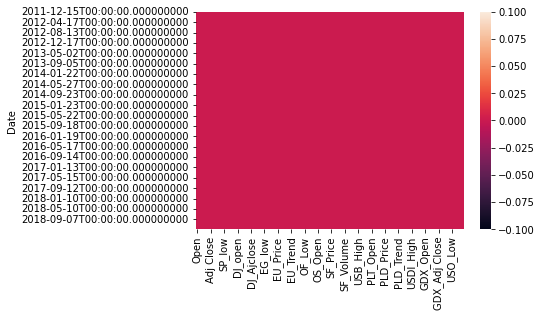

In [99]:
# visualisation avec une carte de chaleur
sns.heatmap(df.isna()); # or df.isna().sum()

In [100]:
# valeurs manquantes
print("\nValeurs Manquantes\n", df.isnull().any())


Valeurs Manquantes
 Open             False
High             False
Low              False
Close            False
Adj Close        False
Volume           False
SP_open          False
SP_high          False
SP_low           False
SP_close         False
SP_Ajclose       False
SP_volume        False
DJ_open          False
DJ_high          False
DJ_low           False
DJ_close         False
DJ_Ajclose       False
DJ_volume        False
EG_open          False
EG_high          False
EG_low           False
EG_close         False
EG_Ajclose       False
EG_volume        False
EU_Price         False
EU_open          False
EU_high          False
EU_low           False
EU_Trend         False
OF_Price         False
OF_Open          False
OF_High          False
OF_Low           False
OF_Volume        False
OF_Trend         False
OS_Price         False
OS_Open          False
OS_High          False
OS_Low           False
OS_Trend         False
SF_Price         False
SF_Open          False
SF_High      

In [101]:
# valeurs uniques
print("\nValeurs Uniques\n", df.nunique())


Valeurs Uniques
 Open             1363
High             1368
Low              1356
Close            1384
Adj Close        1384
Volume           1707
SP_open          1600
SP_high          1597
SP_low           1596
SP_close         1592
SP_Ajclose       1667
SP_volume        1718
DJ_open          1713
DJ_high          1717
DJ_low           1713
DJ_close         1712
DJ_Ajclose       1712
DJ_volume        1644
EG_open           809
EG_high           836
EG_low            823
EG_close          831
EG_Ajclose       1091
EG_volume        1613
EU_Price         1268
EU_open          1282
EU_high          1259
EU_low           1292
EU_Trend            2
OF_Price         1479
OF_Open          1462
OF_High          1458
OF_Low           1472
OF_Volume        1659
OF_Trend            2
OS_Price         1470
OS_Open          1456
OS_High          1465
OS_Low           1471
OS_Trend            2
SF_Price         1636
SF_Open          1556
SF_High          1583
SF_Low           1593
SF_Volume     

### D. Types de variables 

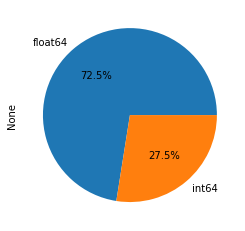

In [102]:
df.dtypes.value_counts().plot.pie(autopct='%1.1f%%');

* Les types de variables sont:
    - Dates
    - float64
    - 22 int64
        
* Nous avons donc une variable catégorielle de type Date et 80 variables quantitatives de type float

### E. Visualisation de la cible (target)

In [103]:
# def visualisation(data):
#     fig = go.Figure()
#     for i in data.columns:
#         fig.add_trace(go.Scatter(x = data.index,y = data[i],mode = 'lines',name = i))
#         fig.show()

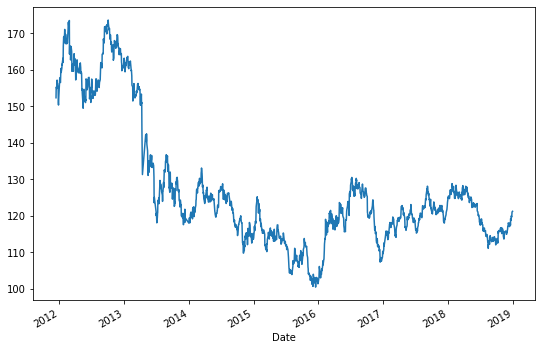

In [104]:
df.loc['2011':'2019']['Adj Close'].plot(figsize=(9,6));

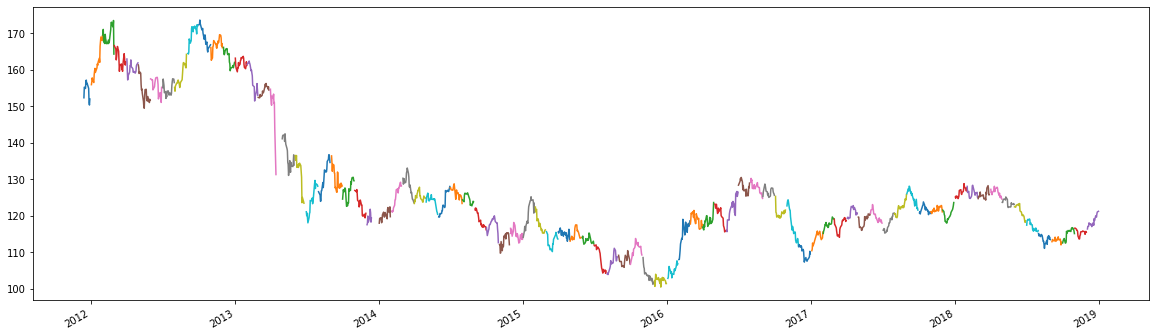

In [105]:
df.loc['2011':'2019', 'Adj Close'].resample('M').plot(figsize=(20,6))
plt.show()

> On remarque que la valeur **maximal** de d'or est atteinte durant l'année **2012** et la valeur **minimale** est atteinte fin **2016**

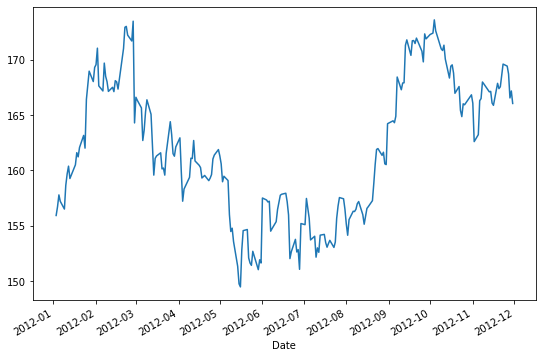

In [106]:
df.loc['2012-01':'2012-11']['Adj Close'].plot(figsize=(9,6))
plt.show()

In [107]:
max_2012 = df.loc['2012-01':'2012-12']['Adj Close'].resample('M').agg(['mean','std','min','max'])

In [108]:
max_2012 = pd.DataFrame(max_2012)
max_2012.sort_values(by = 'max', ascending = False)

,mean,std,min,max
Date,,,,
2012-10-31,169.150526,2.689491,164.860001,173.610001
2012-02-29,169.278500,2.506703,164.289993,173.490005
2012-09-30,169.552105,2.703342,164.309998,172.339996
2012-11-30,166.853001,1.724764,162.600006,169.610001
2012-01-31,161.334211,4.194973,155.919998,169.309998
2012-03-31,162.795001,2.293021,159.570007,166.610001
2012-12-31,163.172000,2.158572,159.729996,166.130005
2012-08-31,158.239546,2.833507,154.130005,164.220001
2012-04-30,160.235501,1.418612,157.210007,162.940002


> Plus precisement le **2012-10-31** l'indice de l'or atteint une valeur de *173.490005* puis on observe une baisse le **2012-05-31** à une valeur de *149.460007* et une **hausse** le 2012-10-31 pour atteindre une valeur **maximale** de *173.610001* durant ses 8 années 

> En effet, la **raison** de ce phénomène est que l'**Inde** a considérablement réduit ses commandes en raison de l’augmentation des droits d’importation du gouvernement 
Toutefois, la tendance s’est inversée à la fin de l’année 2012 à l’approche de la fête Divali au cours de laquelle les utilisateurs devaient absolument acheter de l’or. Les commandes de l’Inde ont considérablement augmenté durant le 4e trimestre, entraînant ainsi une hausse de 41% (262 tonnes) de la demande globale annuelle. Ce revirement de la situation est à l’origine du record trimestriel enregistré sur le marché mondial du métal jaune

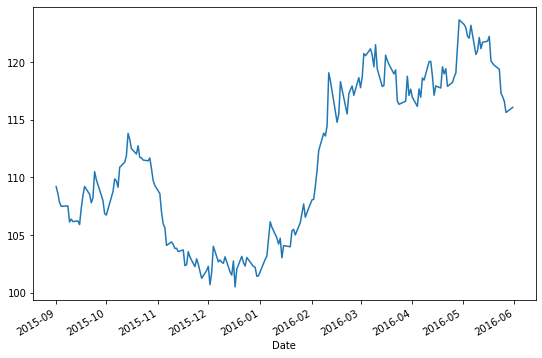

In [109]:
df.loc['2015-09':'2016-05']['Adj Close'].plot(figsize=(9,6))
plt.show()

In [110]:
min_2016 = df.loc['2015-09':'2016-05']['Adj Close'].resample('M').agg(['mean','std','min','max'])

In [111]:
min_2016 = pd.DataFrame(min_2016)
min_2016.sort_values(by = 'min', ascending = True)

,mean,std,min,max
Date,,,,
2015-12-31,102.255909,0.825577,100.500000,104.019997
2015-11-30,103.852999,1.795788,101.250000,108.589996
2016-01-31,105.024445,1.354263,102.889999,107.690002
2015-09-30,107.832857,1.270303,105.900002,110.489998
2015-10-31,110.970476,1.678989,106.730003,113.809998
2016-02-29,114.884000,3.576781,108.050003,119.059998
2016-05-31,120.280477,2.434406,115.620003,123.239998
2016-04-30,118.719524,1.659983,116.150002,123.650002
2016-03-31,118.981364,1.570897,116.330002,121.500000


> Plus precisement le **min** est atteint le 2015-12-31 avec une valeur de *100.500000* sur ces 8 années d'observations

* La majorité des analystes du marché de l’or expliquent la chute du cours de l’or (20 Juillet 2015) selon quatre faits :
    - La reprise de l’économie américaine, associé à un fort dollars, et une hausse attendue des taux d’intérêt. 
    - Un ralentissement de la demande d’or en Chine.
    - La récente liquidation des marchandises, qui est elle-même résulte de la forte hausse du dollars et concerne également la fin de la croissance économique en Chine.
    - Des tensions politiques de fonds atténuées, illustré par la tentative de résolution du plan de sauvetage de la Grèce.

* Et un ralentissement en Chine, plus grand consommateur d’or dans le monde, est un problème de taille.
    https://www.latribune.fr/bourse/trois-explications-a-la-chute-brutale-de-l-or-493149.html

> Ce qui explique cette baisse à *149.460007* le **2012-05-31** Analysons dans un premier temps les **relations** entre les différentes **caractéristiques** de l'indice **or** puis par la **suites** les différentes **relations** entre le **cours ajusté de l'or** et les autres **indices** et **indicateurs**

### F. Compréhension des différentes variables

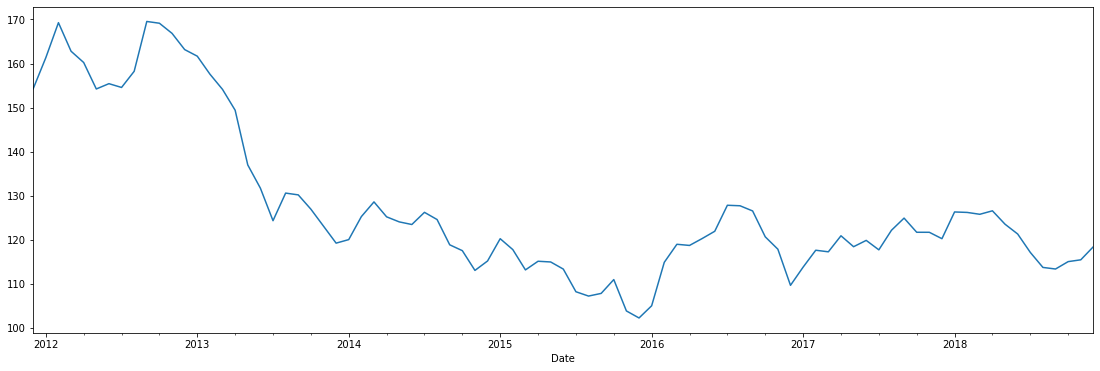

In [112]:
df.loc['2011':'2019', 'Adj Close'].resample('M').mean().plot(figsize=(19,6))
plt.show()

In [113]:
min_moy = df.loc['2015-10':'2016-01', 'Adj Close'].resample('M').agg(['mean','std','min','max'])
min_moy = pd.DataFrame(min_moy)
min_moy.sort_values(by = 'mean', ascending = True)

,mean,std,min,max
Date,,,,
2015-12-31,102.255909,0.825577,100.500000,104.019997
2015-11-30,103.852999,1.795788,101.250000,108.589996
2016-01-31,105.024445,1.354263,102.889999,107.690002
2015-10-31,110.970476,1.678989,106.730003,113.809998


> Le taux moyen le **plus bas** de l'or de **2011 à 2019** regroupé par mois de vaut *102.255909* et est mésuré le **2015-12-31**

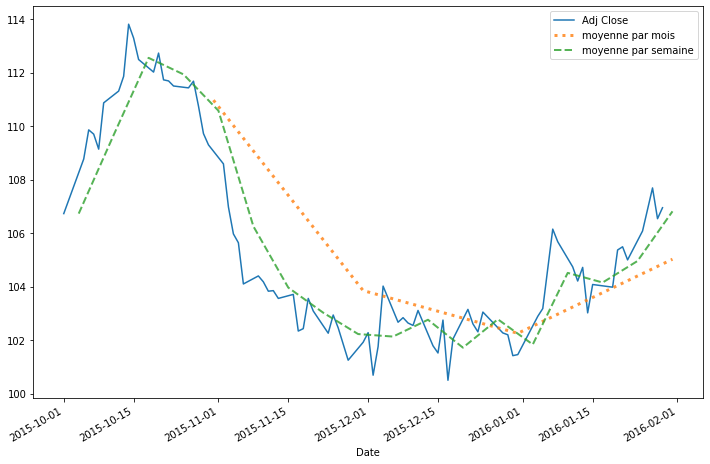

In [114]:
plt.figure(figsize=(12,8))
df.loc['2015-10':'2016-01', 'Adj Close'].plot()
df.loc['2015-10':'2016-01', 'Adj Close'].resample('M').mean().plot(label='moyenne par mois', lw=3, ls=':', alpha=0.8)
df.loc['2015-10':'2016-01', 'Adj Close'].resample('W').mean().plot(label='moyenne par semaine', lw=2, ls='--', alpha=0.8)
plt.legend()
plt.show()

> Les debuts ne sont pas les mêmes. De plus la moyenne par semaine suit la même distribution que la valeur de l'indice de 2015-10 à 2016-01

In [115]:
# m = df['Adj Close'].resample('W').agg(['mean', 'std', 'min', 'max'])

# plt.figure(figsize=(12, 8))
# m['mean']['2015-10':'2016-01'].plot(label='moyenne par semaine')
# plt.fill_between(m.index, m['max'], m['min'], alpha=0.2, label='min-max par semaine')

# plt.legend()
# plt.show()

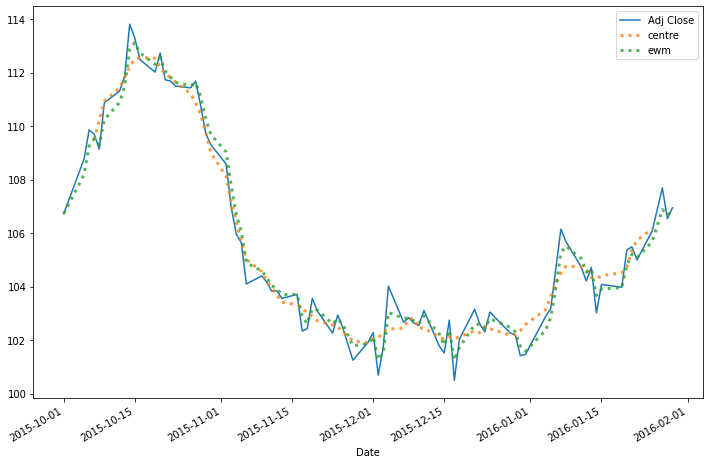

In [116]:
# moyenne mobile exponentielle, les valeurs perdent peu à peu du poids au cours du temps
plt.figure(figsize=(12, 8))
df.loc['2015-10':'2016-01', 'Adj Close'].plot()
# df.loc['2015-10':'2016-01', 'Adj Close'].rolling(window=7).mean().plot(label='non centre', lw=3, ls=':', alpha=0.8)
df.loc['2015-10':'2016-01', 'Adj Close'].rolling(window=7, center=True).mean().plot(label='centre', lw=3, ls=':', alpha=0.8)
df.loc['2015-10':'2016-01', 'Adj Close'].ewm(alpha=0.6).mean().plot(label='ewm', lw=3, ls=':', alpha=0.8)
plt.legend()
plt.show()

> evm est plus précis

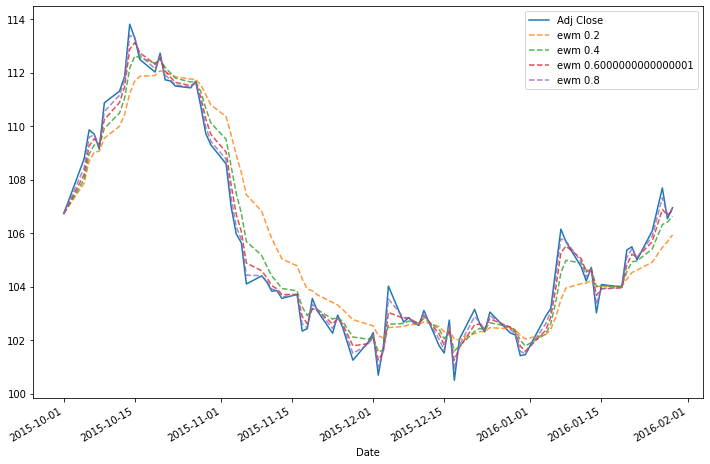

In [117]:
plt.figure(figsize=(12, 8))
df.loc['2015-10':'2016-01', 'Adj Close'].plot()
for i in np.arange(0.2, 1, 0.2):
    df.loc['2015-10':'2016-01', 'Adj Close'].ewm(alpha=i).mean().plot(label=f'ewm {i}', ls='--', alpha=0.8)
plt.legend()
plt.show()

> evm optimisé 

###  cours ajusté or vs ses caractéristiques

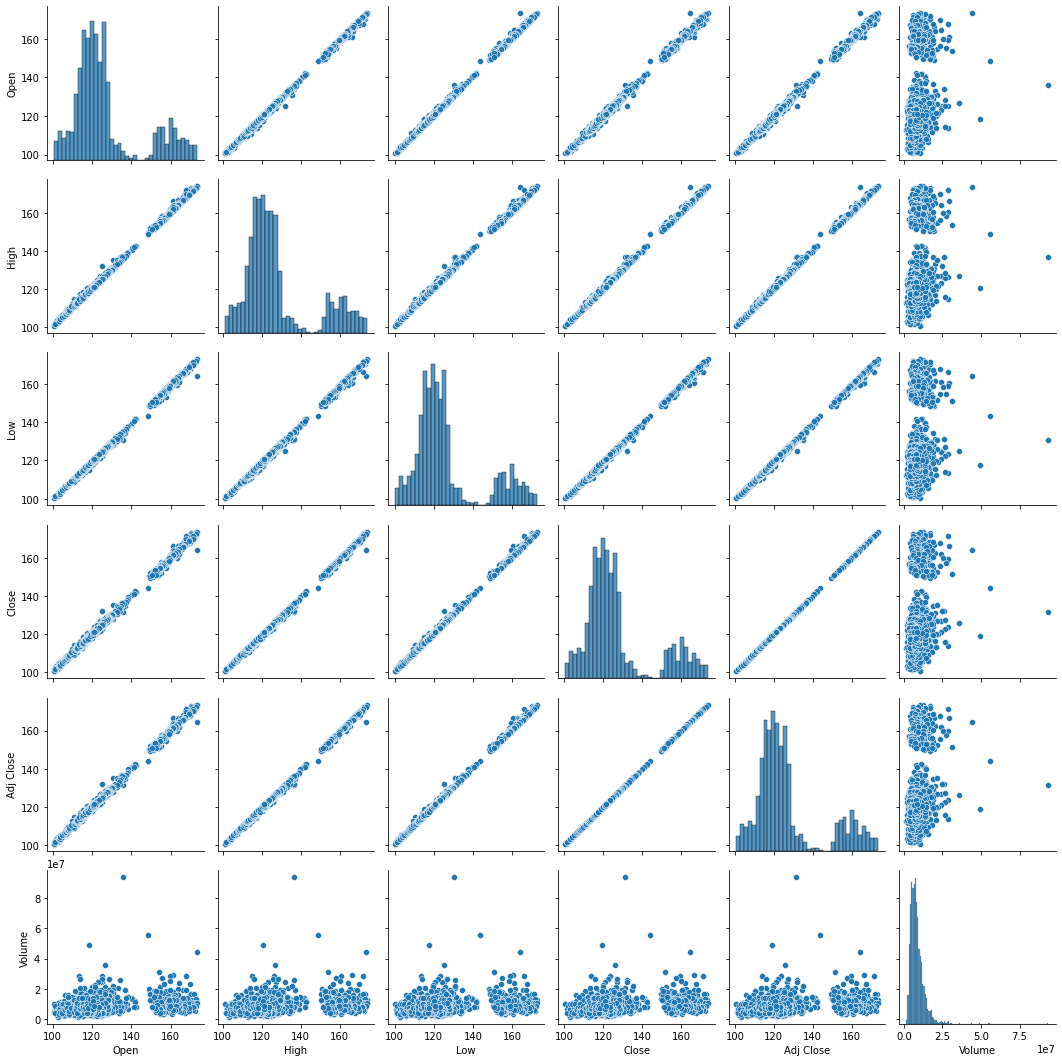

In [118]:
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]);

> il existe une correlation forte linéaire entre le cours ajusté et la valeur à l'ouverture de la bourse, la valeur maximale, la valeur minimale et la valeur à la fermeture. Ce qui n'est pas le cas pour la quantité d'or négocié dans le stock disponible.
De plus les histogrammes des caractéristiques ont une distribution pratiquement identiques à celle du cours ajusté de l'or, excepté la distribution de la quantité d'or négocié qui est étalée sur la droite. La quantité d'or négocié peut être repartie en deux grands groupes

In [119]:
for col in df:
    if col in ['Open', 'High', 'Low', 'Close', 'Volume']:
        print(f"\nMatrice de corrélation entre Adj Close et {col}\n")
        print(df[['Adj Close', col]].corr())


Matrice de corrélation entre Adj Close et Open

           Adj Close      Open
Adj Close   1.000000  0.998976
Open        0.998976  1.000000

Matrice de corrélation entre Adj Close et High

           Adj Close      High
Adj Close   1.000000  0.999535
High        0.999535  1.000000

Matrice de corrélation entre Adj Close et Low

           Adj Close       Low
Adj Close   1.000000  0.999532
Low         0.999532  1.000000

Matrice de corrélation entre Adj Close et Close

           Adj Close  Close
Adj Close        1.0    1.0
Close            1.0    1.0

Matrice de corrélation entre Adj Close et Volume

           Adj Close    Volume
Adj Close   1.000000  0.246778
Volume      0.246778  1.000000


<AxesSubplot:>

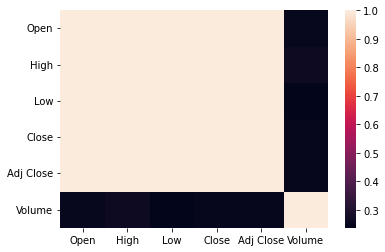

In [120]:
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr())

 > Les variables qui influent sur le cours ajusté de l'or sont: le prix à l'ouverture de la bourse Open, le prix le plus élévé de la journée High, le prix le plus bas de la journée Low et le prix de fermeture Close.

### G. Visualisation des relations : features/target  

* Relation entre le cours ajusté or et les autres indices

In [121]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,192.204570,1.098026e+08,18161.094398,18244.137842,18073.889095,18164.119043,18164.119043,1.779131e+08,28.276554,28.822555,27.653655,28.209302,27.783958,1.136074e+06,1.208494,1.208531,1.213360,1.203692,0.494761,77.504523,77.521740,78.384936,76.593894,225958.585565,0.498836,70.153097,70.275396,71.120256,69.330990,0.503492,43284.478463,43308.692084,43671.194412,42911.912107,26912.462165,0.480792,2.262769,2.263091,2.286512,2.238765,0.490105,1183.915425,1184.388853,1194.274622,1173.409692,0.484284,766.805122,766.363481,773.529302,759.444208,0.530850,1130.442375,89.809427,89.805442,90.098981,89.509331,27568.300349,0.512806,26.747427,27.071304,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,48.514161,4.925110e+07,3889.752079,3906.008604,3867.959072,3884.495887,3884.495887,1.212753e+08,20.325861,20.620624,19.972314,20.294635,19.721857,7.301289e+05,0.100535,0.100579,0.100184,0.100695,0.500118,27.400703,27.366113,27.393294,27.322868,88844.540581,0.500144,23.471514,23.480047,23.494737,23.422198,0.500133,7530.704012,7550.423242,7614.302267,7443.076538,21880.969122,0.499776,0.433469,0.433977,0.437574,0.429960,0.500048,273.842095,273.978168,275.427791,271.799909,0.499898,148.307189,148.078365,149.010291,147.381087,0.499193,570.012881,7.516115,7.520788,7.567895,7.459269,14643.314699,0.499982,10.620552,10.706388,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,104.468536,2.785650e+07,11769.209960,11925.879880,11735.190430,11766.259770,11766.259770,8.410000e+06,2.770000,2.850000,2.730000,2.800000,2.800000,1.645000e+05,1.038700,1.039000,1.041900,1.034100,0.000000,27.880000,27.990000,28.750000,27.100000,11520.000000,0.000000,26.550000,27.340000,27.610000,26.180000,0.000000,33170.000000,33146.000000,33566.000000,32626.000000,40.000000,0.000000,1.358000,1.366000,1.391000,1.321000,0.000000,775.600000,765.300000,786.500000,756.000000,0.000000,470.4500

> On remarque que les données (les couts et prix) ne sont pas dans la même échelle. On peut repartir en 4 groupes qui sont: OR, SP, EG, OF, OS, USDI, GDX, USO; SF, DF; EU, USB; PLT, PLD, RHO.

> On va donc les normaliser (les mettre entre 0 et 1 afin d'avoir des graphiques significatifs)



In [122]:
df_normalizer1 = df[['Adj Close','SP_Ajclose','DJ_Ajclose','EG_Ajclose','EU_Price','OF_Price','OS_Price', 'SF_Price','USB_Price','PLT_Price','PLD_Price','RHO_PRICE','USDI_Price','GDX_Adj Close','USO_Adj Close']]
scaler = RobustScaler()
df_normalizer = scaler.fit_transform(df_normalizer1)
df_normalizer = pd.DataFrame(mod_scaler, columns=df_normalizer1.columns, index=df.index)
df_normalizer.head()

,Adj Close,SP_Ajclose,DJ_Ajclose,EG_Ajclose,EU_Price,OF_Price,OS_Price,SF_Price,USB_Price,PLT_Price,PLD_Price,RHO_PRICE,USDI_Price,GDX_Adj Close,USO_Adj Close
Date,,,,,,,,,,,,,,,
2011-12-15,0.708932,0.005227,0.006808,0.899367,0.741754,0.785133,0.798448,0.636137,0.293993,0.664293,0.204113,0.548077,0.081679,0.866741,0.827313
2011-12-16,0.748598,0.006067,0.006648,0.925062,0.746546,0.767439,0.802866,0.631592,0.262095,0.670114,0.210715,0.538462,0.077997,0.889119,0.831424
2011-12-19,0.743674,0.000000,0.000000,0.794015,0.735269,0.770388,0.806448,0.616120,0.240298,0.660603,0.190290,0.538462,0.076317,0.855329,0.829369
2011-12-20,0.772534,0.016988,0.022395,0.823565,0.758951,0.801810,0.823881,0.632495,0.302499,0.685187,0.214841,0.538462,0.078958,0.896056,0.869310
2011-12-21,0.774997,0.018108,0.022671,0.842836,0.749366,0.811775,0.865194,0.621941,0.325359,0.679262,0.227563,0.538462,0.082039,0.895385,0.885463


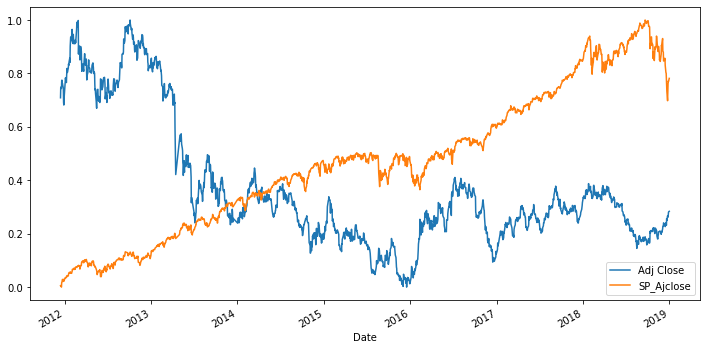

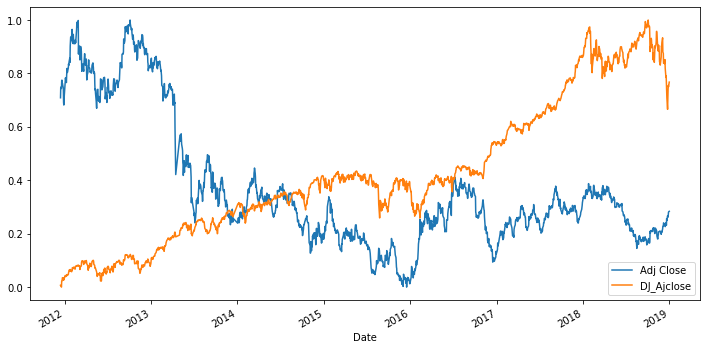

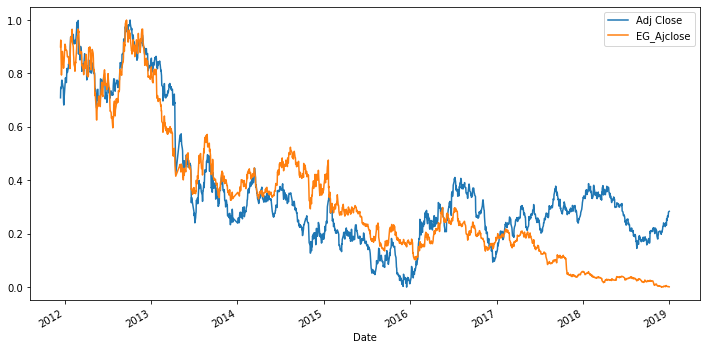

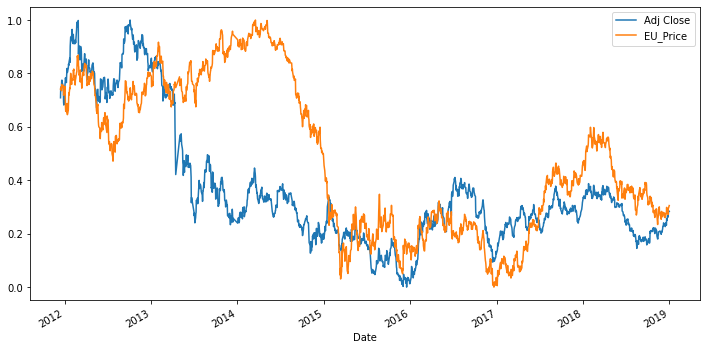

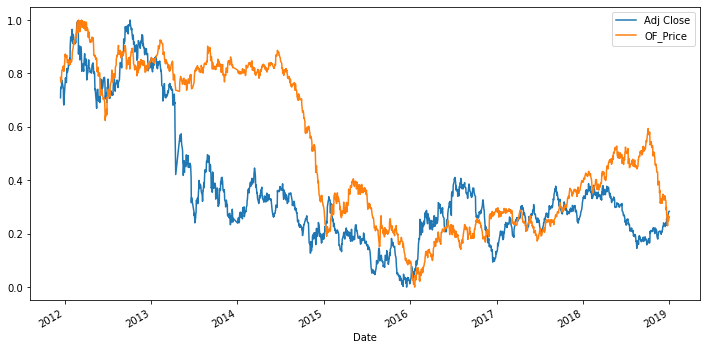

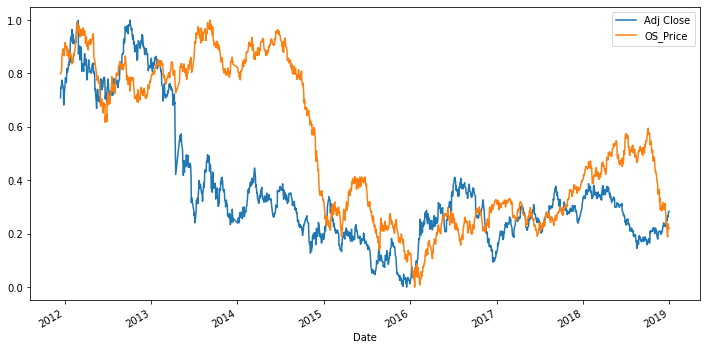

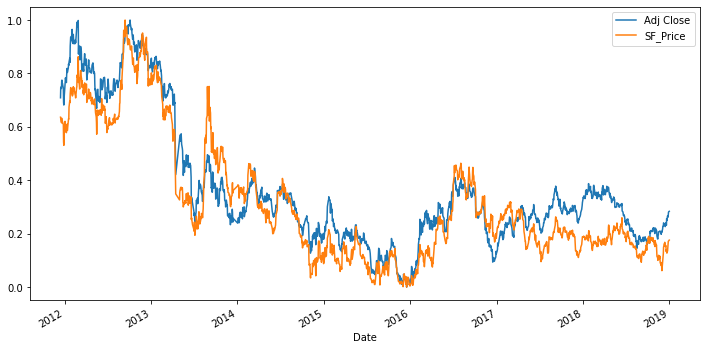

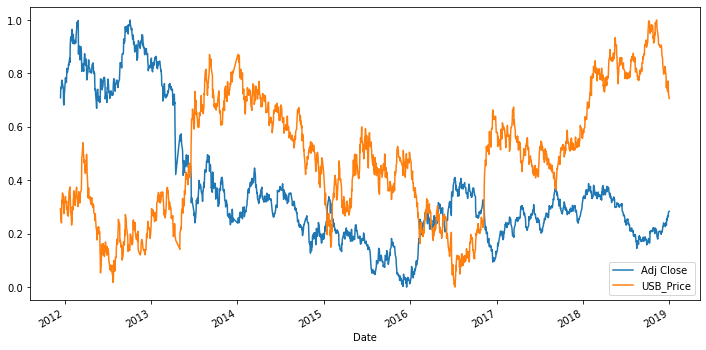

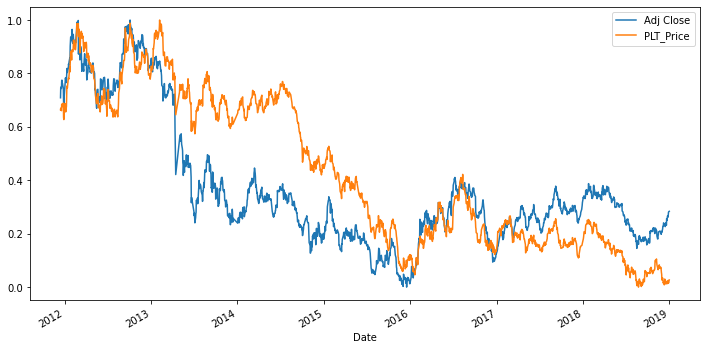

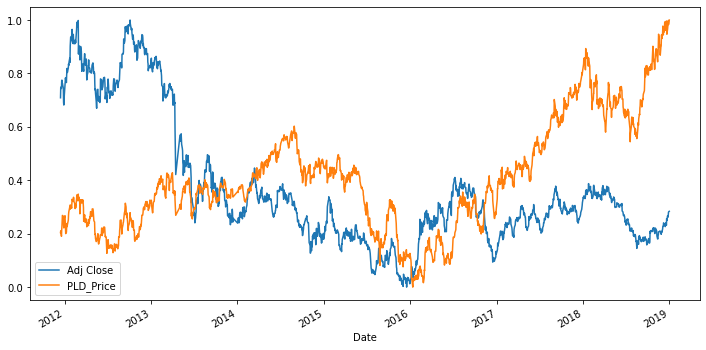

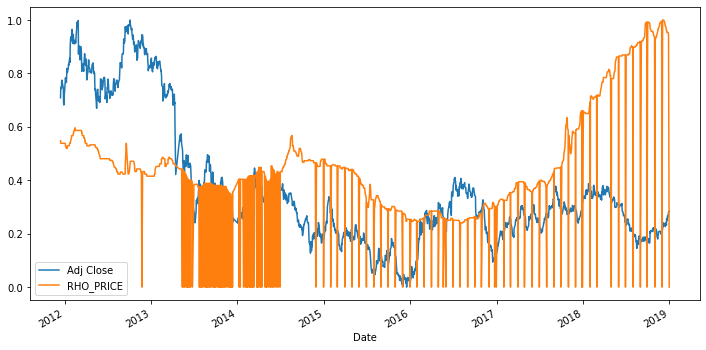

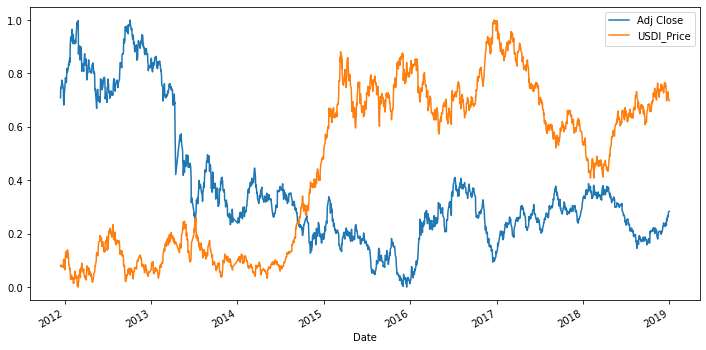

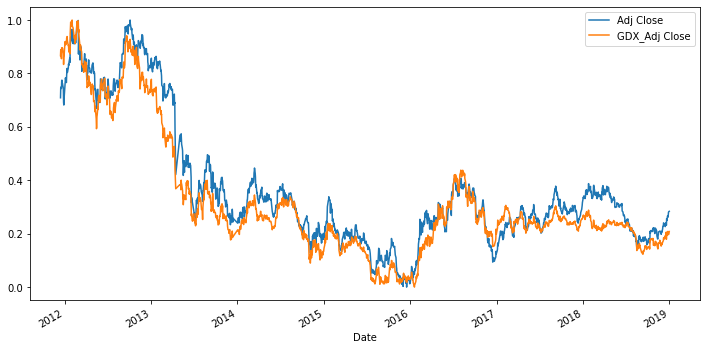

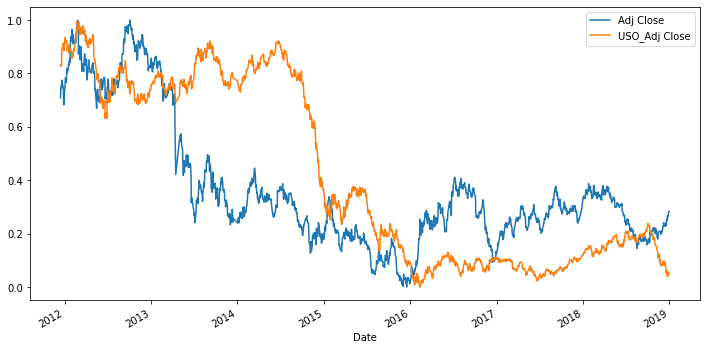

In [123]:
for col in df_normalizer:
    if col in ['SP_Ajclose','DJ_Ajclose','EG_Ajclose','EU_Price','OF_Price', 'OS_Price','SF_Price', 'USB_Price', 'PLT_Price', 'PLD_Price', 'RHO_PRICE', 'USDI_Price', 'GDX_Adj Close', 'USO_Adj Close']:
        plt.figure(figsize=(12,6))
        df_normalizer['Adj Close'].plot(label= 'Adj Close')
        df_normalizer[col].plot(label = str(col))
        plt.legend()

* Comparaison du cout de l'or **(Adjusted)** et des couts des autres variables

> Similitude: 'EG_Ajclose','EU_Price','OF_Price', 'OS_Price','SF_Price','PLT_Price','GDX_Adj Close', 'USO_Adj Close'

> Différence: 'SP_Ajclose','DJ_Ajclose', 'USB_Price', 'PLD_Price', 'RHO_PRICE', 'USDI_Price'

### H. Identification des outliers 

Text(0.4, 0.95, 'Box Plot de Adj Close par rapport à SP_Ajclose, DJ_Ajclose, EG_Ajclose, EU_Price, OF_Price')

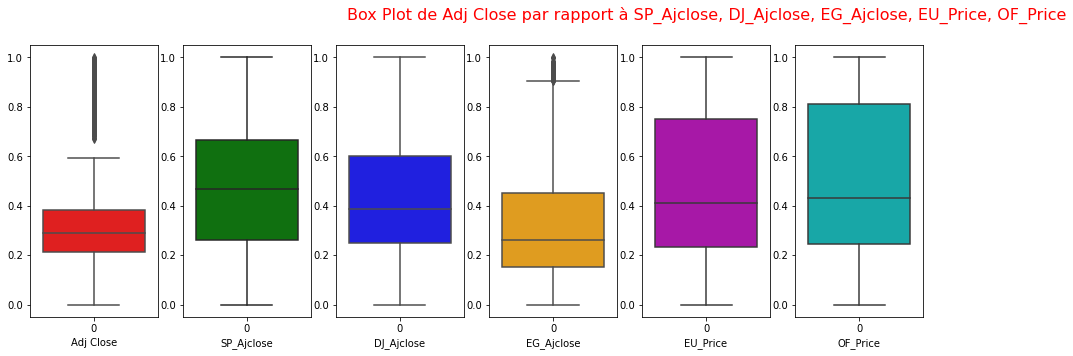

In [125]:
#'Adj Close','SP_Ajclose','DJ_Ajclose','EG_Ajclose','EU_Price','OF_Price','OS_Price', 'SF_Price','USB_Price','PLT_Price','PLD_Price','RHO_PRICE','USDI_Price','GDX_Adj Close','USO_Adj Close'
#créer une figure avec 3 Axes sur la même ligne
fig, ax = plt.subplots(1,6,figsize=(16,5))
#sns.scatterplot(y='tip',x=range(1,245), data=tips,ax=ax[0])
sns.boxplot(data=df_normalizer['Adj Close'], ax=ax[0], color='red')
ax[0].set_xlabel('Adj Close')
sns.boxplot(data=df_normalizer['SP_Ajclose'], ax=ax[1], color='green')
ax[1].set_xlabel('SP_Ajclose')
sns.boxplot(data=df_normalizer['DJ_Ajclose'], ax=ax[2], color='blue')
ax[2].set_xlabel('DJ_Ajclose')
sns.boxplot(data=df_normalizer['EG_Ajclose'], ax=ax[3], color='orange')
ax[3].set_xlabel('EG_Ajclose')
sns.boxplot(data=df_normalizer['EU_Price'], ax=ax[4], color='m')
ax[4].set_xlabel('EU_Price')
sns.boxplot(data=df_normalizer['OF_Price'], ax=ax[5], color='c')
ax[5].set_xlabel('OF_Price')
#ajouter un texte à une figure
fig.text(0.4, 0.95, 'Box Plot de Adj Close par rapport à SP_Ajclose, DJ_Ajclose, EG_Ajclose, EU_Price, OF_Price', fontsize = 16,color='r')

Text(0.4, 0.95, 'Box Plot de Adj Close par rapport à OS_Price, SF_Price, USB_Price, PLT_Price, PLD_Price')

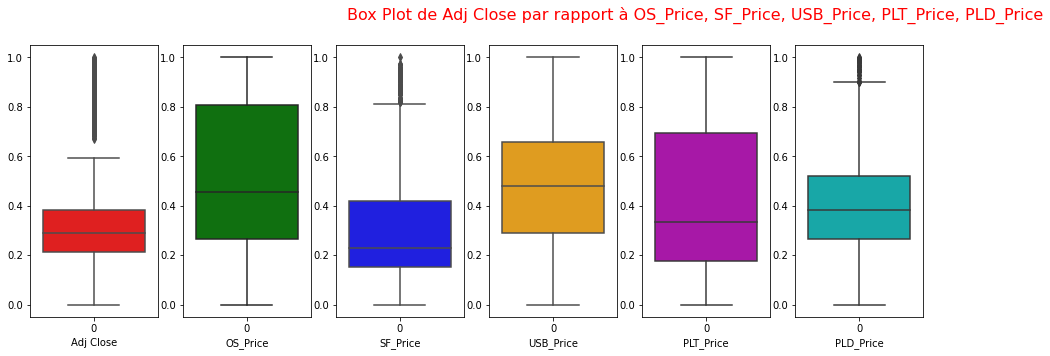

In [126]:
#'Adj Close','SP_Ajclose','DJ_Ajclose','EG_Ajclose','EU_Price','OF_Price','OS_Price', 'SF_Price','USB_Price','PLT_Price','PLD_Price','RHO_PRICE','USDI_Price','GDX_Adj Close','USO_Adj Close'
#créer une figure avec 3 Axes sur la même ligne
fig, ax = plt.subplots(1,6,figsize=(16,5))
#sns.scatterplot(y='tip',x=range(1,245), data=tips,ax=ax[0])
sns.boxplot(data=df_normalizer['Adj Close'], ax=ax[0], color='red')
ax[0].set_xlabel('Adj Close')
sns.boxplot(data=df_normalizer['OS_Price'], ax=ax[1], color='green')
ax[1].set_xlabel('OS_Price')
sns.boxplot(data=df_normalizer['SF_Price'], ax=ax[2], color='blue')
ax[2].set_xlabel('SF_Price')
sns.boxplot(data=df_normalizer['USB_Price'], ax=ax[3], color='orange')
ax[3].set_xlabel('USB_Price')
sns.boxplot(data=df_normalizer['PLT_Price'], ax=ax[4], color='m')
ax[4].set_xlabel('PLT_Price')
sns.boxplot(data=df_normalizer['PLD_Price'], ax=ax[5], color='c')
ax[5].set_xlabel('PLD_Price')
#ajouter un texte à une figure
fig.text(0.4, 0.95, 'Box Plot de Adj Close par rapport à OS_Price, SF_Price, USB_Price, PLT_Price, PLD_Price', fontsize = 16,color='r')

Text(0.4, 0.95, 'Box Plot de Adj Close par rapport à RHO_PRICE, USDI_Price, GDX_Adj Close, USO_Adj Close')

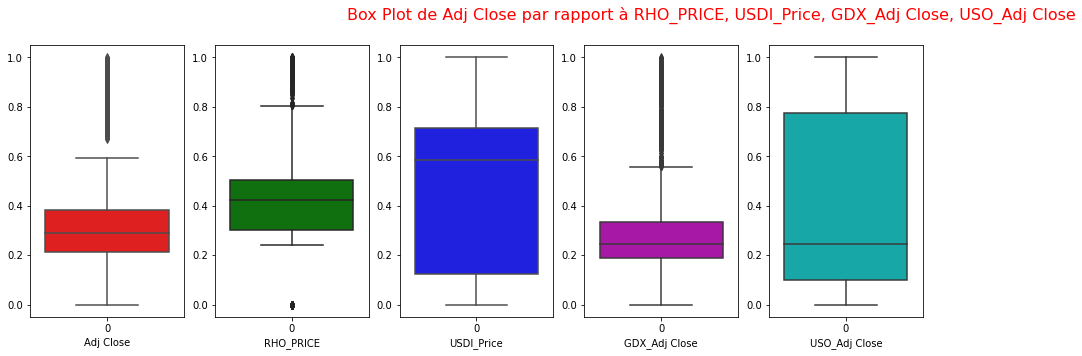

In [127]:
#'Adj Close','SP_Ajclose','DJ_Ajclose','EG_Ajclose','EU_Price','OF_Price','OS_Price', 'SF_Price','USB_Price','PLT_Price','PLD_Price','RHO_PRICE','USDI_Price','GDX_Adj Close','USO_Adj Close'
# sns.boxplot(data=df_normalizer[['Adj Close','SP_Ajclose','DJ_Ajclose','EG_Ajclose','EU_Price','OF_Price','OS_Price', 'SF_Price','USB_Price','PLT_Price','PLD_Price','RHO_PRICE','USDI_Price','GDX_Adj Close','USO_Adj Close']])
#créer une figure avec 3 Axes sur la même ligne
fig, ax = plt.subplots(1,5,figsize=(16,5))
#sns.scatterplot(y='tip',x=range(1,245), data=tips,ax=ax[0])
sns.boxplot(data=df_normalizer['Adj Close'], ax=ax[0], color='red')
ax[0].set_xlabel('Adj Close')
sns.boxplot(data=df_normalizer['RHO_PRICE'], ax=ax[1], color='green')
ax[1].set_xlabel('RHO_PRICE')
sns.boxplot(data=df_normalizer['USDI_Price'], ax=ax[2], color='blue')
ax[2].set_xlabel('USDI_Price')
sns.boxplot(data=df_normalizer['GDX_Adj Close'], ax=ax[3], color='m')
ax[3].set_xlabel('GDX_Adj Close')
sns.boxplot(data=df_normalizer['USO_Adj Close'], ax=ax[4], color='c')
ax[4].set_xlabel('USO_Adj Close')
#ajouter un texte à une figure
fig.text(0.4, 0.95, 'Box Plot de Adj Close par rapport à RHO_PRICE, USDI_Price, GDX_Adj Close, USO_Adj Close', fontsize = 16,color='r')

* Nous distingons deux groupes de variables
    - Les variables présentant des outliers: Adj Close, EG_Ajclose, SF_Price, PLD_Price, RHO_PRICE, GDX_Adj Close

    - Les variables ne présentant pas de outliers: SP_Ajclose, DJ_Ajclose, EU_Price, OF_Price, OS_Price, USB_Price, PLT_Price,USDI_Price,USO_Adj Close
